Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# 1. Replicate the lesson code.

In [0]:
# Imoprt tools:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Titanic data set.
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

In [3]:
# use the titanic csv url to create a dataframe with pandas
titanic_data = pd.read_csv(url)
# check head of data
titanic_data.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# map Survived and Pclass 
titanic_data['Mortality'] = titanic_data['Survived'].map({0:'Died',1:'Survived'})
titanic_data['Class_Group'] = titanic_data['Pclass'].map({1:'First',2:'Second',3:'Third'})

In [5]:
# Check to see if values were mapped
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Mortality,Class_Group
0,0,3,male,22.0,7.2500,Southampton,Died,Third
1,1,1,female,38.0,71.2833,Cherbourg,Survived,First
2,1,3,female,26.0,7.9250,Southampton,Survived,Third
3,1,1,female,35.0,53.1000,Southampton,Survived,First
4,0,3,male,35.0,8.0500,Southampton,Died,Third


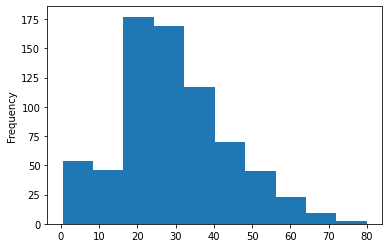

In [6]:
# dislay a continuous variable on a histogram.
titanic_data['Age'].plot(kind='hist');

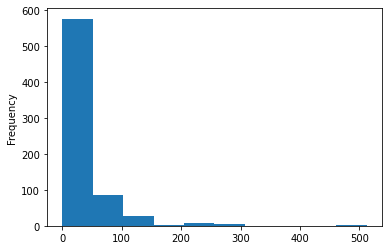

In [7]:
# display another continuous variable 'Fare' from our data
titanic_data['Fare'].plot(kind='hist');

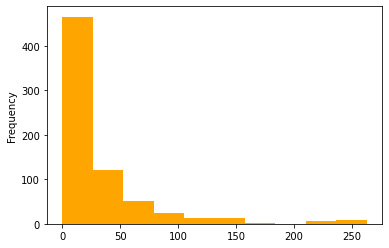

In [8]:
# remove two extreme outliers
titanic_data = titanic_data[titanic_data['Fare']<500]
titanic_data['Fare'].plot(kind='hist',color='orange');

In [9]:
# Continueous variables can be converted to a catagorical var by creating bins.
age_bins = [0,3,12,18,25,55,100]
age_labels = ['baby','child','teen','young adult','adult','senior']
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)
myresults = titanic_data['Age_Group'].value_counts().sort_index()
myresults

baby            30
child           39
teen            70
young adult    162
adult          369
senior          39
Name: Age_Group, dtype: int64

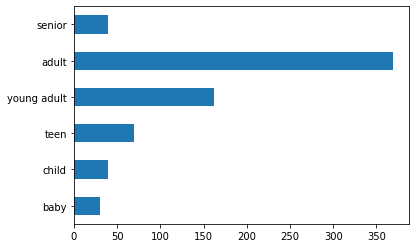

In [23]:
# Check these counts out on a bargraph
myresults.plot(kind='barh');

In [11]:
# check out the dataframe
titanic_data.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Mortality,Class_Group,Age_Group
384,1,3,female,63.0,9.5875,Southampton,Survived,Third,senior
107,1,1,female,19.0,26.2833,Southampton,Survived,First,young adult
375,1,2,female,33.0,27.7500,Southampton,Survived,Second,adult
196,0,1,male,44.0,90.0000,Queenstown,Died,First,adult
84,0,1,male,47.0,52.0000,Southampton,Died,First,adult
478,1,1,male,27.0,30.5000,Southampton,Survived,First,adult
645,1,1,female,33.0,53.1000,Southampton,Survived,First,adult
672,0,3,male,17.0,8.6625,Southampton,Died,Third,teen
554,1,1,female,18.0,227.5250,Cherbourg,Survived,First,teen
685,0,3,male,41.0,14.1083,Southampton,Died,Third,adult


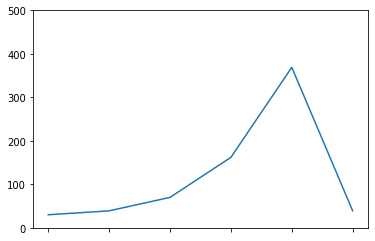

In [25]:
# sometimes it's important to specify the range of your y-axis to get more
# accurate results. 'lim'='limits'
myresults.plot(ylim=(0,500));

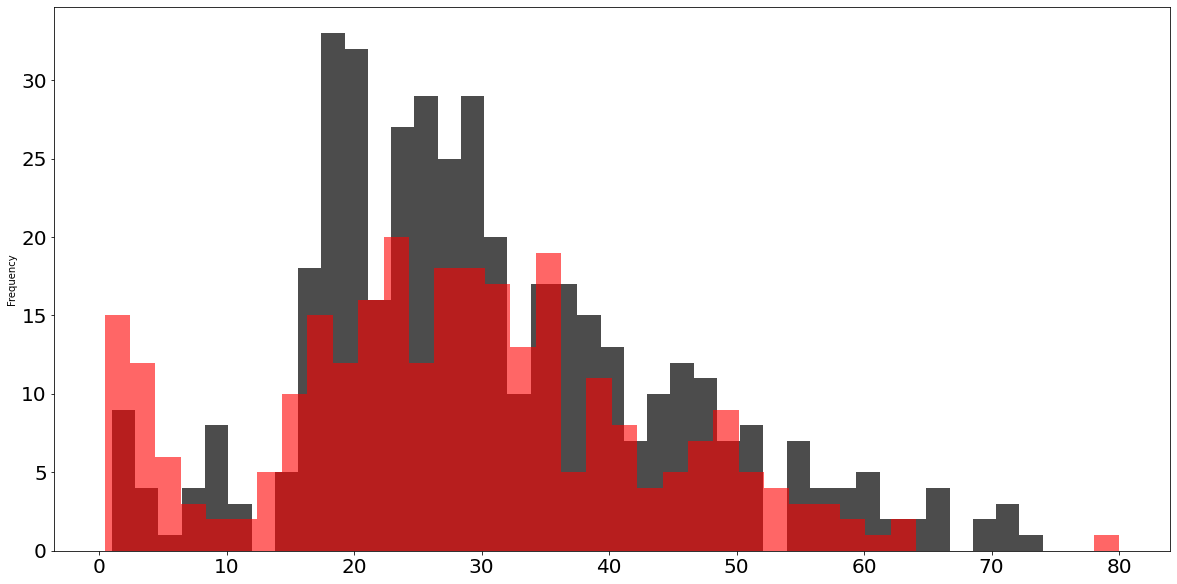

In [41]:
# stacked histogram of continuous variables, broken out by categorical data
titanic_data[titanic_data['Survived']==0]['Age'].plot(kind='hist',bins=40,figsize=(20,10),color='black',fontsize=20,alpha=0.7);
titanic_data[titanic_data['Survived']==1]['Age'].plot(kind='hist',bins=40,figsize=(20,10),color='red',fontsize=20,alpha=0.6);

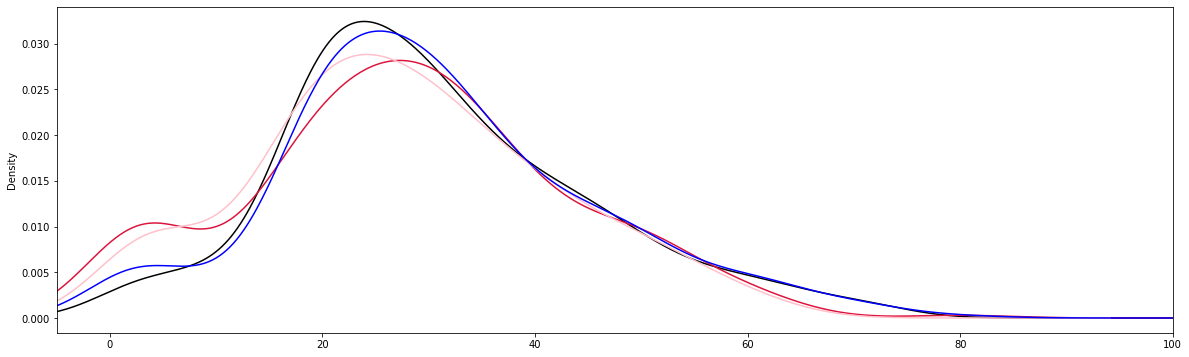

In [54]:
# lets make this plot stack easier to read by useing;
# K.ernel   >
# D.ensity    > KDE
# E.stimate >
titanic_data[titanic_data['Survived']==0]['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='black');
titanic_data[titanic_data['Survived']==1]['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='crimson');
# visualize average age based on sex
titanic_data[titanic_data['Sex']=='female']['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='pink');
titanic_data[titanic_data['Sex']=='male']['Age'].plot(kind='density',xlim=(-5,100), figsize=(20,6), color='blue');

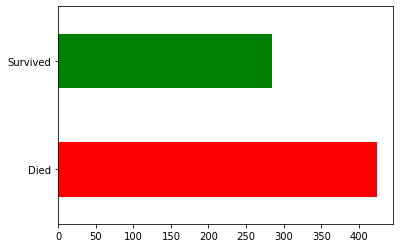

In [69]:
# Using bar charts to display categorical data:
titanic_data['Mortality'].value_counts().plot(kind='barh',color=['red','green']);

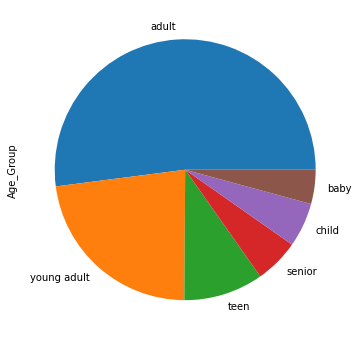

In [77]:
# Now lets use a pie chart to diply some more catagorical data:
# example using created feature 'Age_Group'
titanic_data['Age_Group'].value_counts().plot(kind='pie',figsize=(6,6));

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here